In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [67]:
df = pd.read_csv('C:\dataset/datan9iya.csv')


In [68]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


In [69]:
from sklearn.model_selection import train_test_split


# Division en deux parties égales
df1, df2 = train_test_split(df, test_size=0.5, random_state=42)

# Sauvegarde des deux parties dans deux fichiers différents
df1.to_csv('C:\dataset/data1.csv')
df2.to_csv('C:\dataset/data2.csv')


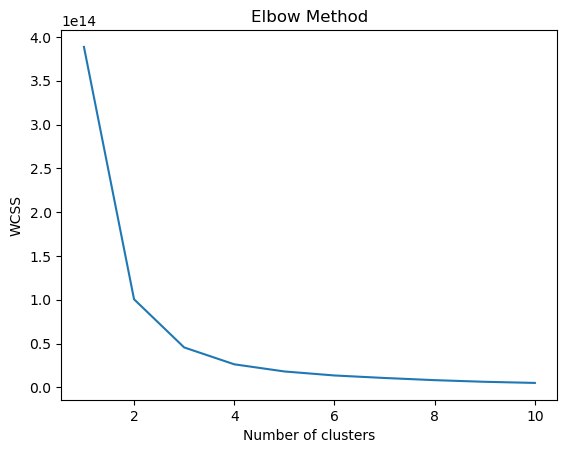

In [71]:

# Chargement des données
data = pd.read_csv('C:/dataset/data1.csv')

# Sélection des colonnes pertinentes
X = data[['CustAccountBalance', 'TransactionAmount (INR)']]

# Détermination du nombre de clusters à utiliser
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()





C:\Users\hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


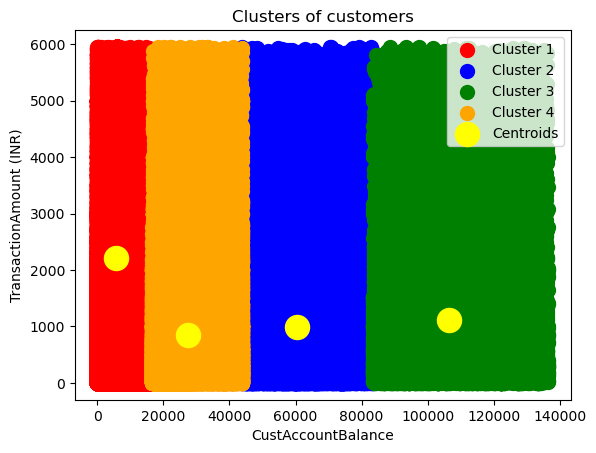

In [72]:
# Application de l'algorithme K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Affichage des clusters
plt.scatter(X[y_kmeans == 0]['CustAccountBalance'], X[y_kmeans == 0]['TransactionAmount (INR)'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['CustAccountBalance'], X[y_kmeans == 1]['TransactionAmount (INR)'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['CustAccountBalance'], X[y_kmeans == 2]['TransactionAmount (INR)'], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['CustAccountBalance'], X[y_kmeans == 3]['TransactionAmount (INR)'], s=100, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.legend()
plt.show()


In [39]:
import pandas as pd
from sklearn.cluster import KMeans

# Chargement des données
data = pd.read_csv('C:\dataset/datan9iya.csv', usecols=['CustAccountBalance', 'TransactionAmount (INR)'])

# Entraînement du modèle k-means
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

# Saisie des informations du nouveau client
balance = float(input("Veuillez saisir le solde du compte du nouveau client : "))
transaction = float(input("Veuillez saisir le montant de la transaction du nouveau client : "))

# Création du nouveau client sous forme de dataframe
new_customer = pd.DataFrame({'CustAccountBalance': [balance], 'TransactionAmount (INR)': [transaction]})

# Prédiction du cluster du nouveau client
cluster = kmeans.predict(new_customer)

print("Le nouveau client appartient au cluster : ", cluster[0])



Veuillez saisir le solde du compte du nouveau client : 4500
Veuillez saisir le montant de la transaction du nouveau client : 466
Le nouveau client appartient au cluster :  2


In [45]:
from sklearn.metrics import davies_bouldin_score

# Chargement des données
data = pd.read_csv('C:/dataset/data1.csv')

# Sélection des colonnes pertinentes
X = data[['CustAccountBalance', 'TransactionAmount (INR)']]

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Évaluation de la qualité de la segmentation
dbi = davies_bouldin_score(X, y_kmeans)
print('Davies-Bouldin index:', dbi)



Davies-Bouldin index: 0.5018397682923231


In [73]:
import numpy as np

# Obtention des étiquettes de cluster uniques
labels = np.unique(y_kmeans)

# Affichage des noms de cluster
for label in labels:
    print(f'Cluster {label+1}')


Cluster 1
Cluster 2
Cluster 3
Cluster 4
